In [ ]:
#importing the libraries that will be used
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

#importing the sklearn libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

In [ ]:
#Here the function that calculates the pearson correlation coefficient is defined
def pearson(x,y):
    if len(x)!=len(y):
        print("I can't calculate Pearson's Coefficient, sets are not of the same length!")
        return
    else:
        sumxy = 0
    for i in range(len(x)):
        sumxy = sumxy + x[i]*y[i]
        return (sumxy - len(x)*np.mean(x)*np.mean(y))\
    /((len(x)-1)*np.std(x, ddof=1)*np.std(y, ddof=1))
        

In [ ]:
#import the dataset
df = pd.read_csv('/Users/abu/Documents/erasmus_plus_project2014-2016.csv')

In [84]:
df.head()

,ActionType,CallYear,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,School education staff mobility,2016,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,School education staff mobility,2016,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,School education staff mobility,2016,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,School education staff mobility,2016,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,School education staff mobility,2016,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#dropping empty columns
df.dropna(axis='columns')

,ActionType,CallYear,ProjectIdentifier,ProjectTitle,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,CoordinatingOrganisationName,Coordinator's address,Coordinator'sCountry
0,School education staff mobility,2016,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,ongoing,"53,110.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Oberschule Eschen,"Fronagass 16, 9492, Eschen",LI
1,School education staff mobility,2016,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,finalized,"11,685.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Realschule Triesen,"Landstrasse 313, 9495, Triesen",LI
2,School education staff mobility,2016,2016-1-BE03-KA101-013516,Creative and critical mind,finalized,"1,455.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Zentrum für Förderpädagogik,"Monschauer Strasse 26, 4700, Eupen",BE
3,School education staff mobility,2016,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,finalized,"24,924.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Grundschulabteilung des Königlichen Athenäums ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",BE
4,School education staff mobility,2016,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,finalized,"5,896.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,"Lascheterweg 20, 4700, Eupen",BE
5,School education staff mobility,2016,2016-1-BE03-KA101-013521,Musikimpulse,finalized,"1,899.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Musikakademie der Deutschsprachigen Gemeinschaft,"Bergstrasse 124, 4700, Eupen",BE
6,School education staff mobility,2016,2016-1-BE03-KA101-013523,Schulen in aller Welt musizieren,finalized,"2,123.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater-Damian-Förderschule,"Heidberg 16-18, 4700, Eupen",BE
7,School education staff mobility,2016,2016-1-BE03-KA101-013525,Kompetenzerweiterung des Lehrkörpers 2,finalized,"11,561.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater - Damian - Sekundarschule,"Kaperberg 2 - 4, 4700, Eupen",BE
8,School education staff mobility,2016,2016-2-BE03-KA101-013543,Führung und Management in Bildungseinrichtunge...,finalized,"4,406.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Robert-Schuman-Institut,"Vervierser Straße 89-93, 4700, Eupen",BE
9,School education staff mobility,2016,2016-2-BE03-KA101-013549,Kreativer und motivierender Unterricht in eine...,finalized,"2,511.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,"Lascheterweg 20, 4700, Eupen",BE


In [86]:
#importing the LabelEncoder which will be used in converting yes/no categories to numeric values
from sklearn.preprocessing import LabelEncoder

In [87]:
df.dtypes

ActionType                       object
CallYear                          int64
ProjectIdentifier                object
ProjectTitle                     object
Topics                           object
ProjectSummary                   object
ProjectStatus                    object
EUGrantAward                     object
IsGoodPractice                   object
IsSuccessStory                   object
ProjectWebsite                   object
ResultsAvailable                 object
ResultsPlatformProjectCard       object
ParticipatingCountries           object
CoordinatingOrganisationName     object
CoordinatingOrganisationType     object
Coordinator's address            object
Coordinator'sRegion              object
Coordinator'sCountry             object
Unnamed: 19                     float64
Unnamed: 20                     float64
Unnamed: 21                     float64
Unnamed: 22                     float64
Unnamed: 23                     float64
Unnamed: 24                     float64


In [88]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,ActionType,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ProjectWebsite,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,CoordinatingOrganisationName,CoordinatingOrganisationType,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Oberschule Eschen,School/Institute/Educational centre – General ...,"Fronagass 16, 9492, Eschen",NaN,LI
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Realschule Triesen,School/Institute/Educational centre – General ...,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Zentrum für Förderpädagogik,School/Institute/Educational centre – General ...,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Grundschulabteilung des Königlichen Athenäums ...,School/Institute/Educational centre – General ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,School/Institute/Educational centre – General ...,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE


In [89]:
obj_df[obj_df.isnull().any(axis=1)]

,ActionType,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ProjectWebsite,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,CoordinatingOrganisationName,CoordinatingOrganisationType,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Oberschule Eschen,School/Institute/Educational centre – General ...,"Fronagass 16, 9492, Eschen",NaN,LI
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Realschule Triesen,School/Institute/Educational centre – General ...,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Zentrum für Förderpädagogik,School/Institute/Educational centre – General ...,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Grundschulabteilung des Königlichen Athenäums ...,School/Institute/Educational centre – General ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,School/Institute/Educational centre – General ...,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE
5,School education staff mobility,2016-1-BE03-KA101-013521,Musikimpulse,New innovative curricula/educational methods/d...,The music teacher of our academy of music will...,finalized,"1,899.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Musikakademie der Deutschsprachigen Gemeinschaft,School/Institute/Educational centre – Vocation...,"Bergstrasse 124, 4700, Eupen",NaN,BE
6,School education staff mobility,2016-1-BE03-KA101-013523,Schulen in aller Welt musizieren,Creativity and culture,Learning mobilities to be undertaken as part o...,finalized,"2,123.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater-Damian-Förderschule,Other,"Heidberg 16-18, 4700, Eupen",Prov. Liège,BE
7,School education staff mobility,2016-1-BE03-KA101-013525,Kompetenzerweiterung des Lehrkörpers 2,ICT - new technologies - digital competences; ...,The Pater Damian School would like to develop ...,finalized,"11,561.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater - Damian - Sekundarschule,School/Institute/Educational centre – General ...,"Kaperberg 2 - 4, 4700, Eupen",Prov. Liège,BE
8,School education staff mobility,2016-2-BE03-KA101-013543,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school faces the difficult task of adaptin...,finalized,"4,406.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Robert-Schuman-Institut,School/Institute/Educational centre – Vocation...,"Vervierser Straße 89-93, 4700, Eupen",Prov. Liège,BE
9,School education staff mobility,2016-2-BE03-KA101-013549,Kreativer und mo

In [90]:
obj_df.dropna(axis='columns')

,ActionType,ProjectIdentifier,ProjectTitle,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,CoordinatingOrganisationName,Coordinator's address,Coordinator'sCountry
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,ongoing,"53,110.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Oberschule Eschen,"Fronagass 16, 9492, Eschen",LI
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,finalized,"11,685.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Realschule Triesen,"Landstrasse 313, 9495, Triesen",LI
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,finalized,"1,455.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Zentrum für Förderpädagogik,"Monschauer Strasse 26, 4700, Eupen",BE
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,finalized,"24,924.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Grundschulabteilung des Königlichen Athenäums ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",BE
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,finalized,"5,896.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,"Lascheterweg 20, 4700, Eupen",BE
5,School education staff mobility,2016-1-BE03-KA101-013521,Musikimpulse,finalized,"1,899.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Musikakademie der Deutschsprachigen Gemeinschaft,"Bergstrasse 124, 4700, Eupen",BE
6,School education staff mobility,2016-1-BE03-KA101-013523,Schulen in aller Welt musizieren,finalized,"2,123.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater-Damian-Förderschule,"Heidberg 16-18, 4700, Eupen",BE
7,School education staff mobility,2016-1-BE03-KA101-013525,Kompetenzerweiterung des Lehrkörpers 2,finalized,"11,561.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Pater - Damian - Sekundarschule,"Kaperberg 2 - 4, 4700, Eupen",BE
8,School education staff mobility,2016-2-BE03-KA101-013543,Führung und Management in Bildungseinrichtunge...,finalized,"4,406.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Robert-Schuman-Institut,"Vervierser Straße 89-93, 4700, Eupen",BE
9,School education staff mobility,2016-2-BE03-KA101-013549,Kreativer und motivierender Unterricht in eine...,finalized,"2,511.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,"Lascheterweg 20, 4700, Eupen",BE


In [91]:
obj_df["ActionType"] = obj_df["ActionType"].astype('category')

In [92]:
obj_df["ActionType_Cat"] = obj_df["ActionType"].cat.codes
obj_df.head()

,ActionType,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ProjectWebsite,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,CoordinatingOrganisationName,CoordinatingOrganisationType,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry,ActionType_Cat
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Oberschule Eschen,School/Institute/Educational centre – General ...,"Fronagass 16, 9492, Eschen",NaN,LI,6
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,Realschule Triesen,School/Institute/Educational centre – General ...,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI,6
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Zentrum für Förderpädagogik,School/Institute/Educational centre – General ...,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE,6
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Grundschulabteilung des Königlichen Athenäums ...,School/Institute/Educational centre – General ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE,6
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,NaN,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,Königliches Athenäum Eupen,School/Institute/Educational centre – General ...,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE,6


In [93]:
obj_df["ProjectStatus"] = obj_df["ProjectStatus"].astype('category')
obj_df["ProjectStatus_cat"] = obj_df["ProjectStatus"].cat.codes

obj_df["IsGoodPractice"] = obj_df["IsGoodPractice"].astype('category')
obj_df["IsGoodPractice_cat"] = obj_df["IsGoodPractice"].cat.codes
obj_df.head()

obj_df["ResultsAvailable"] = obj_df["ResultsAvailable"].astype('category')
obj_df["ResultsAvailable_cat"] = obj_df["ResultsAvailable"].cat.codes
obj_df.head()

obj_df["ParticipatingCountries"] = obj_df["ParticipatingCountries"].astype('category')
obj_df["ParticipatingCountries_cat"] = obj_df["ParticipatingCountries"].cat.codes
obj_df.head()

,ActionType,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ProjectWebsite,...,CoordinatingOrganisationName,CoordinatingOrganisationType,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry,ActionType_Cat,ProjectStatus_cat,IsGoodPractice_cat,ResultsAvailable_cat,ParticipatingCountries_cat
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,NaN,...,Oberschule Eschen,School/Institute/Educational centre – General ...,"Fronagass 16, 9492, Eschen",NaN,LI,6,1,0,0,13513
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,NaN,...,Realschule Triesen,School/Institute/Educational centre – General ...,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI,6,0,0,0,13513
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,NaN,...,Zentrum für Förderpädagogik,School/Institute/Educational centre – General ...,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,NaN,...,Grundschulabteilung des Königlichen Athenäums ...,School/Institute/Educational centre – General ...,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE,6,0,0,0,621
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,NaN,...,Königliches Athenäum Eupen,School/Institute/Educational centre – General ...,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621


In [94]:
obj_df["Coordinator'sRegion"] = obj_df["Coordinator'sRegion"].astype('category')
obj_df["Coordinator'sRegion_cat"] = obj_df["Coordinator'sRegion"].cat.codes

obj_df["Coordinator'sCountry"] = obj_df["Coordinator'sCountry"].astype('category')
obj_df["Coordinator'sCountry_cat"] = obj_df["Coordinator'sCountry"].cat.codes
obj_df.head()

,ActionType,ProjectIdentifier,ProjectTitle,Topics,ProjectSummary,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ProjectWebsite,...,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry,ActionType_Cat,ProjectStatus_cat,IsGoodPractice_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,School education staff mobility,2016-1-LI01-KA101-000050,Interkulturelles Lernen im demokratischen Bild...,Teaching and learning of foreign languages; In...,In the three-tier school system on secondary s...,ongoing,"53,110.00",No,No,NaN,...,"Fronagass 16, 9492, Eschen",NaN,LI,6,1,0,0,13513,-1,24
1,School education staff mobility,2016-1-LI01-KA101-000057,KA 1 Realschule Triesen,Intercultural/intergenerational education and ...,Liechtenstein is a very small country with 37'...,finalized,"11,685.00",No,No,NaN,...,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI,6,0,0,0,13513,213,24
2,School education staff mobility,2016-1-BE03-KA101-013516,Creative and critical mind,New innovative curricula/educational methods/d...,The competence centre of the centre for specia...,finalized,"1,455.00",No,No,NaN,...,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621,313,2
3,School education staff mobility,2016-1-BE03-KA101-013517,Stressreduktion- und Prävention durch Achtsamk...,Health and wellbeing,Mindfulness for teachers – a four-day training...,finalized,"24,924.00",No,No,NaN,...,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE,6,0,0,0,621,313,2
4,School education staff mobility,2016-1-BE03-KA101-013519,Führung und Management in Bildungseinrichtunge...,New innovative curricula/educational methods/d...,Our school is facing the difficult task of ada...,finalized,"5,896.00",No,No,NaN,...,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621,313,2


In [95]:
obj_df.describe

<bound method NDFrame.describe of                                 ActionType  \
0          School education staff mobility   
1          School education staff mobility   
2          School education staff mobility   
3          School education staff mobility   
4          School education staff mobility   
5          School education staff mobility   
6          School education staff mobility   
7          School education staff mobility   
8          School education staff mobility   
9          School education staff mobility   
10         School education staff mobility   
11         School education staff mobility   
12         School education staff mobility   
13         School education staff mobility   
14         School education staff mobility   
15         School education staff mobility   
16         School education staff mobility   
17         School education staff mobility   
18         School education staff mobility   
19         School education staff mobility   


In [96]:
x_train = obj_df.drop(['ProjectIdentifier', 'ProjectTitle','Topics', 'ProjectSummary', 'ProjectWebsite','CoordinatingOrganisationName','CoordinatingOrganisationType'], axis=1)

In [97]:
x_train.head()

,ActionType,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ResultsAvailable,ResultsPlatformProjectCard,ParticipatingCountries,Coordinator's address,Coordinator'sRegion,Coordinator'sCountry,ActionType_Cat,ProjectStatus_cat,IsGoodPractice_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,School education staff mobility,ongoing,"53,110.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,"Fronagass 16, 9492, Eschen",NaN,LI,6,1,0,0,13513,-1,24
1,School education staff mobility,finalized,"11,685.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,LI,"Landstrasse 313, 9495, Triesen",Liechtenstein,LI,6,0,0,0,13513,213,24
2,School education staff mobility,finalized,"1,455.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,"Monschauer Strasse 26, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621,313,2
3,School education staff mobility,finalized,"24,924.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,"Untere Büchelstrasse 2, 4780, Sankt Vith",Prov. Liège,BE,6,0,0,0,621,313,2
4,School education staff mobility,finalized,"5,896.00",No,No,No,https://ec.europa.eu/programmes/erasmus-plus/p...,BE,"Lascheterweg 20, 4700, Eupen",Prov. Liège,BE,6,0,0,0,621,313,2


In [98]:
x_train = x_train.drop(["ActionType", "ResultsPlatformProjectCard","Coordinator's address","Coordinator'sRegion","Coordinator'sCountry"], axis=1)

In [99]:
x_train.head()

,ProjectStatus,EUGrantAward,IsGoodPractice,IsSuccessStory,ResultsAvailable,ParticipatingCountries,ActionType_Cat,ProjectStatus_cat,IsGoodPractice_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,ongoing,"53,110.00",No,No,No,LI,6,1,0,0,13513,-1,24
1,finalized,"11,685.00",No,No,No,LI,6,0,0,0,13513,213,24
2,finalized,"1,455.00",No,No,No,BE,6,0,0,0,621,313,2
3,finalized,"24,924.00",No,No,No,BE,6,0,0,0,621,313,2
4,finalized,"5,896.00",No,No,No,BE,6,0,0,0,621,313,2


In [100]:
x_train = x_train.drop(["ProjectStatus", "IsGoodPractice","IsSuccessStory","ResultsAvailable","ParticipatingCountries"], axis=1)

In [101]:
x_train.head()

,EUGrantAward,ActionType_Cat,ProjectStatus_cat,IsGoodPractice_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,"53,110.00",6,1,0,0,13513,-1,24
1,"11,685.00",6,0,0,0,13513,213,24
2,"1,455.00",6,0,0,0,621,313,2
3,"24,924.00",6,0,0,0,621,313,2
4,"5,896.00",6,0,0,0,621,313,2


In [102]:
y_train = x_train.pop('IsGoodPractice_cat')

In [103]:
x_train.head()

,EUGrantAward,ActionType_Cat,ProjectStatus_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,"53,110.00",6,1,0,13513,-1,24
1,"11,685.00",6,0,0,13513,213,24
2,"1,455.00",6,0,0,621,313,2
3,"24,924.00",6,0,0,621,313,2
4,"5,896.00",6,0,0,621,313,2


In [104]:
x_train.dtypes

EUGrantAward                  object
ActionType_Cat                  int8
ProjectStatus_cat               int8
ResultsAvailable_cat            int8
ParticipatingCountries_cat     int16
Coordinator'sRegion_cat        int16
Coordinator'sCountry_cat        int8
dtype: object

In [105]:
col = ['EUGrantAward']
x_train[col] = x_train[col].apply(lambda x: pd.to_numeric(x.astype(str)
                                                         .str.replace(',',''), errors='coerce'))

In [106]:
x_train.head()

,EUGrantAward,ActionType_Cat,ProjectStatus_cat,ResultsAvailable_cat,ParticipatingCountries_cat,Coordinator'sRegion_cat,Coordinator'sCountry_cat
0,53110.0,6,1,0,13513,-1,24
1,11685.0,6,0,0,13513,213,24
2,1455.0,6,0,0,621,313,2
3,24924.0,6,0,0,621,313,2
4,5896.0,6,0,0,621,313,2


In [107]:
x_train.dtypes

EUGrantAward                  float64
ActionType_Cat                   int8
ProjectStatus_cat                int8
ResultsAvailable_cat             int8
ParticipatingCountries_cat      int16
Coordinator'sRegion_cat         int16
Coordinator'sCountry_cat         int8
dtype: object

In [108]:
#scaling was carried out next
Scaler = StandardScaler().fit(x_train)

In [109]:
x_train = Scaler.transform(x_train)

In [110]:
#initialize the k-fold with k=5
from sklearn.model_selection import KFold, GridSearchCV
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#the next section of code is to enable the calculation of accuracy, precision and recall scores
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [146]:
nb=GaussianNB()
nb_validation=[nb.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(nb, x_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.90 (+/- 0.02)


array([ 0.90946115,  0.87844612,  0.91901629,  0.90726817,  0.90147243,
        0.91557018,  0.90850697,  0.90300846,  0.90003134,  0.88326543])

In [147]:
nb=GaussianNB()
nb_validation=[nb.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(nb, x_train, y_train, cv=10, scoring = 'f1_weighted')
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

F1: 0.87 (+/- 0.01)


array([ 0.88109485,  0.86310344,  0.88572828,  0.87258969,  0.8682422 ,
        0.87759132,  0.8750643 ,  0.87381164,  0.87235229,  0.86441414])

In [150]:
nb=GaussianNB()
nb_validation=[nb.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(nb, x_train, y_train, cv=10, scoring = 'precision_weighted')
print("precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

precision: 0.86 (+/- 0.05)


array([ 0.87129633,  0.8497594 ,  0.9154986 ,  0.84979873,  0.84021342,
        0.90176399,  0.8580511 ,  0.85517567,  0.8531586 ,  0.84841091])

In [151]:
nb=GaussianNB()
nb_validation=[nb.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(nb, x_train, y_train, cv=10, scoring = 'recall_weighted')
print("recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

precision: 0.90 (+/- 0.02)


array([ 0.90946115,  0.87844612,  0.91901629,  0.90726817,  0.90147243,
        0.91557018,  0.90850697,  0.90300846,  0.90003134,  0.88326543])

In [155]:
from sklearn import svm
svc=svm.SVC(kernel='linear', C=1)
svc_validation=[svc.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(svc, x_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.91 (+/- 0.00)


array([ 0.91431704,  0.91431704,  0.91431704,  0.91431704,  0.91431704,
        0.91431704,  0.91430362,  0.91444688,  0.91444688,  0.91444688])

In [156]:
svc=svm.SVC(kernel='linear', C=1)
svc_validation=[svc.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='f1_weighted')
print("f1_weighted: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/s

Accuracy: 0.87 (+/- 0.00)


/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.87339311,  0.87339311,  0.87339311,  0.87339311,  0.87339311,
        0.87339311,  0.87337359,  0.87358193,  0.87358193,  0.87358193])

In [158]:
svc=svm.SVC(kernel='linear', C=1)
svc_validation=[svc.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='precision_weighted')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/pyt

Precision: 0.84 (+/- 0.00)


/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.83597565,  0.83597565,  0.83597565,  0.83597565,  0.83597565,
        0.83597565,  0.83595111,  0.8362131 ,  0.8362131 ,  0.8362131 ])

In [159]:
svc=svm.SVC(kernel='linear', C=1)
svc_validation=[svc.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
           for train, test in kfold.split(x_train)]
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='recall_weighted')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Recall: 0.91 (+/- 0.00)


array([ 0.91431704,  0.91431704,  0.91431704,  0.91431704,  0.91431704,
        0.91431704,  0.91430362,  0.91444688,  0.91444688,  0.91444688])

In [148]:
#Initialise Extra-Trees Random Forest
rf = ExtraTreesClassifier(n_estimators=500, random_state=0)
        #Run K-fold validation with RF
        #Again the classifier is trained on the k-1 sub-sets and then tested on the remaining k-th subset
        #and scores are calcualted
rf_validation=[rf.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(rf, x_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.85 (+/- 0.13)


array([ 0.88612155,  0.8825188 ,  0.69862155,  0.90946115,  0.90632832,
        0.910401  ,  0.80620398,  0.7795362 ,  0.8484801 ,  0.8754309 ])

In [161]:
#Initialise Extra-Trees Random Forest
rf = ExtraTreesClassifier(n_estimators=500, random_state=0)
        #Run K-fold validation with RF
        #Again the classifier is trained on the k-1 sub-sets and then tested on the remaining k-th subset
        #and scores are calcualted
rf_validation=[rf.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='precision_weighted')
print("precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

precision: 0.86 (+/- 0.03)


array([ 0.87019439,  0.87225118,  0.83796643,  0.87289709,  0.86881581,
        0.88304735,  0.85208171,  0.83522987,  0.86744285,  0.86428456])

In [162]:
#Initialise Extra-Trees Random Forest
rf = ExtraTreesClassifier(n_estimators=500, random_state=0)
        #Run K-fold validation with RF
        #Again the classifier is trained on the k-1 sub-sets and then tested on the remaining k-th subset
        #and scores are calcualted
rf_validation=[rf.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='recall_weighted')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Recall: 0.85 (+/- 0.13)


array([ 0.88612155,  0.8825188 ,  0.69862155,  0.90946115,  0.90632832,
        0.910401  ,  0.80620398,  0.7795362 ,  0.8484801 ,  0.8754309 ])

In [149]:
#Initialise Extra-Trees Random Forest
rf = ExtraTreesClassifier(n_estimators=500, random_state=0)
        #Run K-fold validation with RF
        #Again the classifier is trained on the k-1 sub-sets and then tested on the remaining k-th subset
        #and scores are calcualted
rf_validation=[rf.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "f1_weighted")
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

F1: 0.85 (+/- 0.08)


array([ 0.87746874,  0.87710818,  0.7577676 ,  0.88218551,  0.88067934,
        0.89011614,  0.8273989 ,  0.80582822,  0.85742959,  0.86961737])

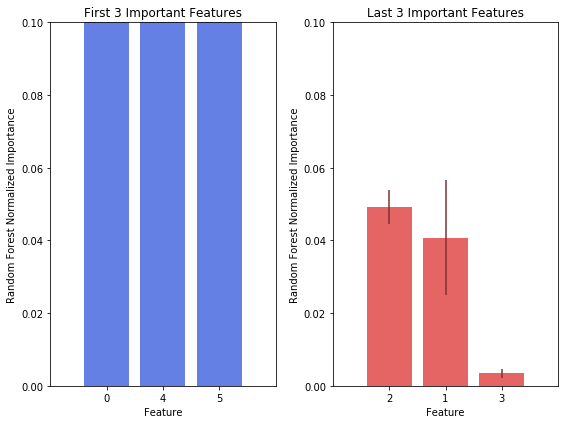

In [176]:
### We extract the importances, their indices and standard deviations
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
imp_std = np.std([est.feature_importances_ for est in rf.estimators_], axis=0)

#And we plot the first and last 3 features out of curiosity
fig = plt.figure(figsize=(8, 6))
gs1 = gridspec.GridSpec(1, 2)#, height_ratios=[1, 1]) 
ax1, ax2 = fig.add_subplot(gs1[0]), fig.add_subplot(gs1[1])
ax1.margins(0.05), ax2.margins(0.05) 
ax1.bar(range(3), importances[indices][:3], \
       color="#6480e5", yerr=imp_std[indices][:3], ecolor='#31427e', align="center")
ax2.bar(range(3), importances[indices][-3:], \
       color="#e56464", yerr=imp_std[indices][-3:], ecolor='#7e3131', align="center")
ax1.set_xticks(range(3)), ax2.set_xticks(range(3))
ax1.set_xticklabels(indices[:3]), ax2.set_xticklabels(indices[-3:])
ax1.set_xlim([-1, 3]), ax2.set_xlim([-1, 3])
ax1.set_ylim([0, 0.1]), ax2.set_ylim([0, 0.1])
ax1.set_xlabel('Feature'), ax2.set_xlabel('Feature')
ax1.set_ylabel('Random Forest Normalized Importance') 
ax2.set_ylabel('Random Forest Normalized Importance')
ax1.set_title('First 3 Important Features'), ax2.set_title('Last 3 Important Features')
gs1.tight_layout(fig)
plt.show()

In [163]:
#We first define the ranges for each parameter we are interested in searching 
#(while the others are left as default):
#C is the inverse of the regularization strength
#tol is the tolerance for stopping the criteria
params = {'C':[100, 1000], 'tol': [0.001, 0.0001]}
#We initialise the Logistic Regression
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
#We initialise the Exhaustive Grid Search, we leave the scoring as the default function of 
#the classifier singe log loss gives an error when running with K-fold cross validation
#add n_jobs=-1 in a parallel computing calculation to use all CPUs available
#cv=3 increasing this parameter makes it too difficult for kaggle to run the script
gs = GridSearchCV(lr, params, scoring=None, refit='True', cv=3) 
gs_validation=[gs.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(gs, x_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores


Accuracy: 0.91 (+/- 0.00)


array([ 0.91431704,  0.91431704,  0.91322055,  0.91431704,  0.91431704,
        0.91431704,  0.91195363,  0.91444688,  0.91444688,  0.91444688])

In [165]:
gs = GridSearchCV(lr, params, scoring=None, refit='True', cv=3) 
gs_validation=[gs.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(gs, x_train, y_train, cv=10, scoring = 'precision_weighted')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/pyt

Precision: 0.84 (+/- 0.00)


/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.83597565,  0.83597565,  0.83588966,  0.83597565,  0.83597565,
        0.83597565,  0.83576655,  0.8362131 ,  0.8362131 ,  0.8362131 ])

In [171]:
gs = GridSearchCV(lr, params, scoring=None, refit='True', cv=3) 
gs_validation=[gs.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(gs, x_train, y_train, cv=10, scoring = 'recall_weighted')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Recall: 0.91 (+/- 0.00)


array([ 0.91431704,  0.91431704,  0.91322055,  0.91431704,  0.91431704,
        0.91431704,  0.91195363,  0.91444688,  0.91444688,  0.91444688])

In [169]:
gs = GridSearchCV(lr, params, scoring=None, refit='True', cv=3) 
gs_validation=[gs.fit(x_train[train], y_train[train]).score(x_train[test], y_train[test]).mean() \
               for train, test in kfold.split(x_train)]
scores = cross_val_score(gs, x_train, y_train, cv=10, scoring='f1_weighted')
print("f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abu/anaconda3/lib/python3.6/s

f1: 0.87 (+/- 0.00)


/Users/abu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.87339311,  0.87339311,  0.87284565,  0.87339311,  0.87339311,
        0.87339311,  0.8721995 ,  0.87358193,  0.87358193,  0.87358193])

In [122]:
print("Validation Results\n==========================================")
print("Naive Bayes: " + '{:1.3f}'.format(np.mean(nb_validation)) + u' \u00B1 ' \
       + '{:1.3f}'.format(np.std(nb_validation)))
print("Random Forest: " + '{:1.3f}'.format(np.mean(rf_validation)) + u' \u00B1 ' \
       + '{:1.3f}'.format(np.std(rf_validation)))
print("Logistic Regression: " + '{:1.3f}'.format(np.mean(gs_validation)) + u' \u00B1 ' \
       + '{:1.3f}'.format(np.std(gs_validation)))

Validation Results
Naive Bayes: 0.903 ± 0.004
Random Forest: 0.894 ± 0.004
Logistic Regression: 0.914 ± 0.004


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, x_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()